# Central Limit Theorem

Have you ever heard the comment that *if you draw many samples from a distribution, the sample will be of a normal distribution*, and it is guaranteed by the magical **Central Limit Theorem** ?

Think for a moment:

- if we were sampling from a uniform distribution between 0 and 1, how could the samples ever be of normal distribution ?
- if we were sampling from a highly skewed distribution, how could the adding more samples make it balanced, as normal distribution should be ?

Could the **Central Limit Theorem** just mean that the sample will be of a normal distribution if the population is of normal distribution too ? But isn't that too trivial to be called a theorem ?

It turns out that it is the *means of the samples* will be of a normal distribution, not the *samples* themselves.

# Example 1: Uniform Distribution

In [86]:
#| echo: false
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

sns.set_theme(style="darkgrid")

Suppose we are given a dataset consists of numbers uniformly distributed between 0 and 1.

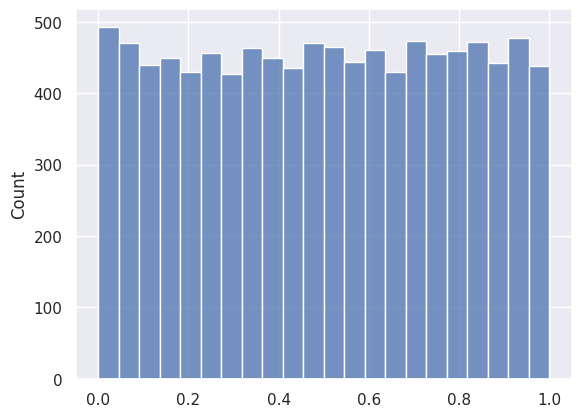

In [93]:
#| code-fold: true
#| label: fig-uniform
#| fig-cap: the population is of uniform distribution
#| cap-location: bottom
data = np.random.uniform(size=10000)
_ = sns.histplot(data)

We can randomly sample 100 data points from the population and calculate the sample mean.

In [94]:
sample = np.random.choice(data, 100)
sample.mean()

0.5453087847471367

The sample mean is a random variable because of the random sampling process.

In [95]:
for _ in range(5):
    sample = np.random.choice(data, 100)
    print(sample.mean())

0.4780188476724967
0.4884357038347728
0.49375289478957385
0.46197942889944293
0.4611685890607802


If we run the sampling process 10000 times, and plot the distribution of the *sample means*, we can see that it is indeed approximately of normal distribution. 

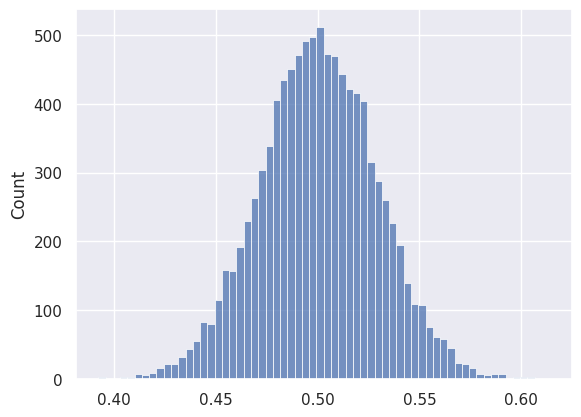

In [99]:
#| code-fold: true
#| label: fig-normal
#| fig-cap: the sample mean is approximately of normal distribution
#| cap-location: bottom
sampling_means = []
for _ in range(10000):
    sample = np.random.choice(data, 100)
    mean = sample.mean()
    sampling_means.append(mean)
_ = sns.histplot(sampling_means)

As we increase the sample size, we can see the sample mean is converging to the expected value: 0.5, that is, the sampling error decresases.

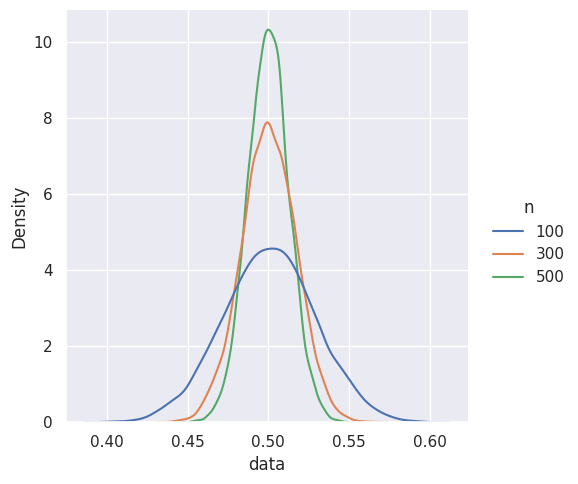

In [101]:
#| code-fold: true
#| label: fig-size
#| fig-cap: the sample mean distribution for different sample sizes
#| cap-location: bottom

sampling_means = []
for n in [100, 300, 500]:
    for _ in range(10000):
        sample = np.random.choice(data, n)
        mean = sample.mean()
        sampling_means.append({"n": str(n), "data": mean})

df = pd.DataFrame(sampling_means)
_ = sns.displot(df, x="data", kind="kde", hue="n")

# Example 2: Highly Skewed Distribution

But the power of the *Central Limit Theorem* is that it can be applied to any distribution with a finite mean and standard deviation. So even if we are sampling from a highly skewed distribution, the sample mean itself is going to be of normal distribution, and hence balanced.

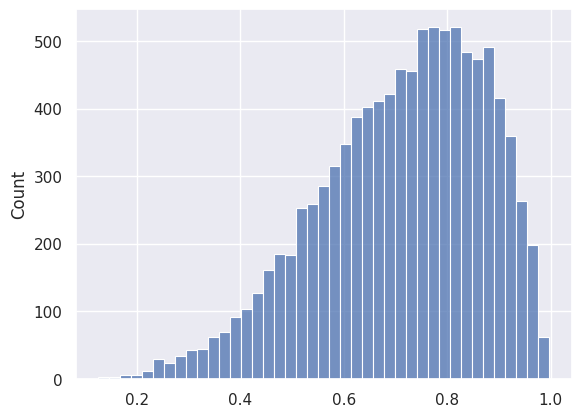

In [105]:
#| code-fold: true
#| label: fig-skewed
#| fig-cap: the population is skewed to the right
#| cap-location: bottom
data = np.random.beta(5, 2, size=10000)
_ = sns.histplot(data)

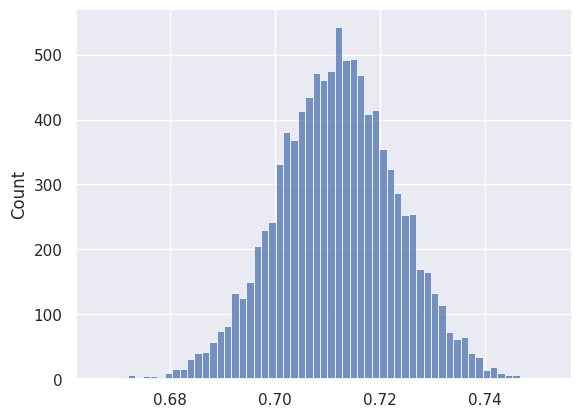

In [107]:
#| code-fold: true
#| label: fig-skewed_normal
#| fig-cap: the sample mean is approximately of normal distribution even if the population is skewed
#| cap-location: bottom

sampling_means = []
for _ in range(10000):
    sample = np.random.choice(data, 200)
    mean = sample.mean()
    sampling_means.append(mean)
_ = sns.histplot(sampling_means)

# Intuition

In simple term, CLT can be expressed as

::: {.callout-note appearance="simple"}
## Central Limit Theorem

The sum of $n$ independent random variables will be approximately a normal distribution provided that each has finite variance, and that no small set of the variables contributes most of the variation.
:::

Intuitively, if something is affected by many independent factors, that something will likely be uniformly distributed. For example, at least 180 genes contribute to human height, and we can assume that they are largely independent: gene A gives longer neck, gene B longer torso, gene C longer bones, etc. Human height is approximately normally distributed because it is caused by the sum of the independent effects of all these genes. 

Thinking in this way, we can begin to see why normal distribution can be seen everywhere in the nature. It is because natural phenomena most likely have many independent small factors. 